# Inventor Disambiguation Summaries

This document shows the use of the `InventorDisambiguationSummary` class to obtain descriptive statistics and visualizations of the output of an inventor disambiguation algorithm.

The key assumption is that the disambiguation algorithm has resulted in a table with the following columns:
- **uuid**: the inventor's mention uuid
- **inventor_id**: the inventor unique id assigned by the disambiguation algorithm
- **name_first**: the inventor's mention first name
- **name_last**: the inventor's mention last name

This table will be used to instanciate `InventorDisambiguationSummary` objects and generate summaries.

## Dependencies

In order to execute this notebook, you need the development environment described below.

#### Development environment:

- Need conda.
- Development environment can be created and updated using:
```sh
    cd PatentsView-Evaluation
    make env
    conda activate pv-evaluation
```
- Package **pv-evaluation** can be installed using `pip install -e .`

#### Package imports

In [1]:
import wget
import zipfile
import os

import plotly.io as pio
pio.templates.default = "plotly_white" # Set plotly theme

from pv_evaluation.summary import InventorDisambiguationSummary

#### Data download

Here we use the current PatentsView inventor disambiguation algorithm as our example throughout. The disambiguation result is contained in the dataset `rawinventor.tsv` from PatentsView's bulk data download.

This dataset is downloaded below:

In [2]:
if not os.path.isfile("rawinventor.tsv"):
    wget.download("https://s3.amazonaws.com/data.patentsview.org/download/rawinventor.tsv.zip")
    with zipfile.ZipFile("rawinventor.tsv.zip", 'r') as zip_ref:
        zip_ref.extractall(".")
    os.remove("rawinventor.tsv.zip")

## Examples

#### Setting up InventorDisambigationSummary object

To get started, instanciate a `InventorDisambiguationSummary` object using the disambiguation table output. Note:

- The argument `processed_data_dir` is set to the home directory in order to save and re-use processed data across executions of this notebook.
- The argument `name` is used to identify the disambiguation algorithm considered. This is used for when multiple algorithms are compared to each other.

In [3]:
summarizer = InventorDisambiguationSummary("rawinventor.tsv", processed_data_dir=".", name="PV-Current")

### Cluster sizes

#### Cluster size distribution data

Get the cluster size distribution as a table:

In [4]:
summarizer.get_cluster_size_distribution()

,Number of patents,Number of inventors
0,1,1754888
1,2,636677
2,3,340817
3,4,218452
4,5,151663
...,...,...
645,577,1
646,582,1
647,586,1
648,593,1


#### Cluster size distribution plot

Plot the cluster size distribution:

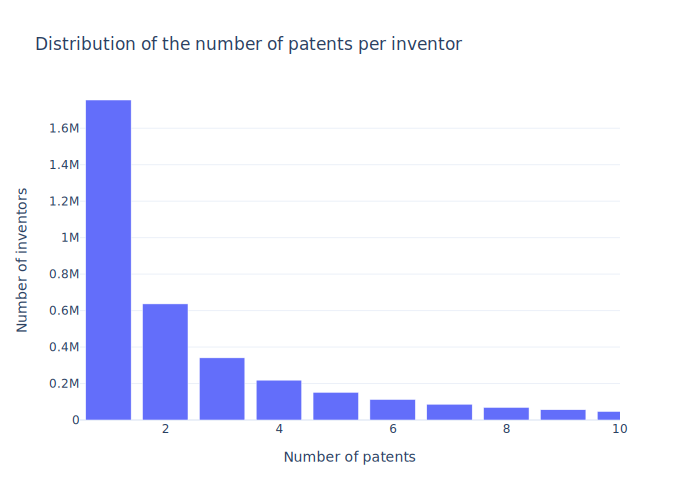

In [5]:
fig = summarizer.plot_cluster_size_distribution(range=(0.5,10))
fig.show("svg")

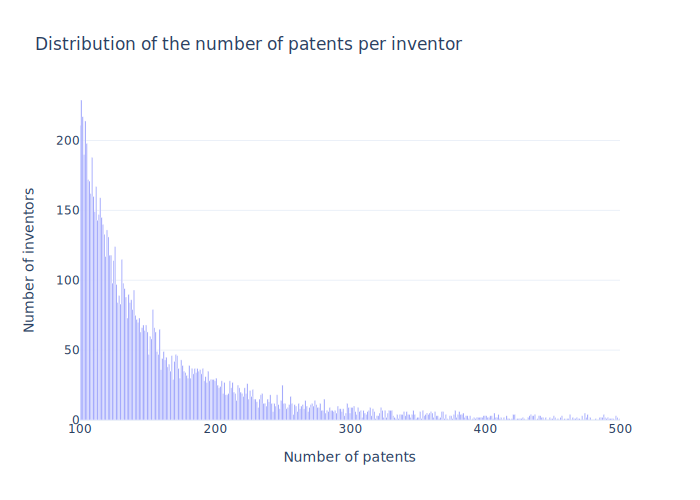

In [6]:
fig = summarizer.plot_cluster_size_distribution(range=(100,500))
fig.show("svg")

#### Show histograms side by side

Use `compare_plots()` from `pv_evaluation.utils` in order to compare plots next to each other:

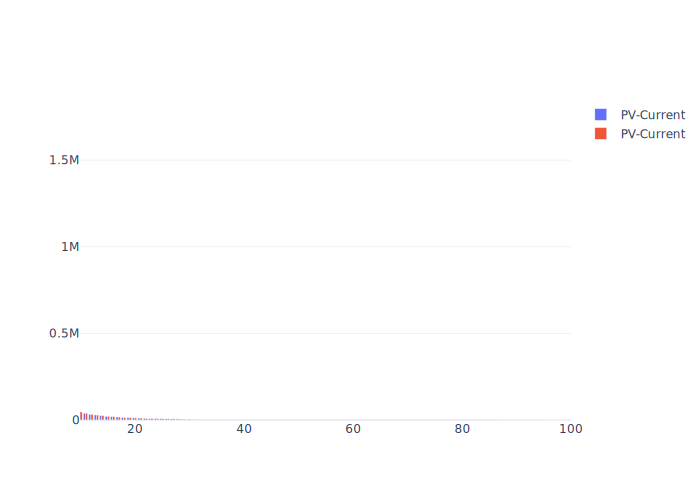

In [7]:
from pv_evaluation.utils import compare_plots

fig1 = summarizer.plot_cluster_size_distribution(range=(0,10))
fig2 = summarizer.plot_cluster_size_distribution(range=(0,10))
fig = compare_plots(fig1, fig2)
fig.show("svg")

#### Top inventors

In [8]:
summarizer.get_top_inventors()

,Number of patents,name_first,name_last
inventor_id,,,
fl:sh_ln:yamazaki-81,6027,Shunpei,Yamazaki
fl:ki_ln:silverbrook-1,4778,Kia,Silverbrook
fl:ka_ln:cheng-65,2523,Kangguo,Cheng
fl:jo_ln:ive-8,2084,Jonathan P.,Ive
fl:lo_ln:wood-15,1956,Lowell L.,"Wood, Jr."
fl:ro_ln:hyde-3,1879,Roderick A.,Hyde
fl:du_ln:kerr-15,1738,Duncan Robert,Kerr
fl:ba_ln:andre-17,1716,Bartley K.,Andre
fl:ri_ln:howarth-13,1632,Richard P.,Howarth


#### Entropy curve

Show the [Hill Numbers](https://en.wikipedia.org/wiki/Diversity_index) (exponentiated [Rényi entropy](https://en.wikipedia.org/wiki/R%C3%A9nyi_entropy)) entropy curve for the cluster size distribution:

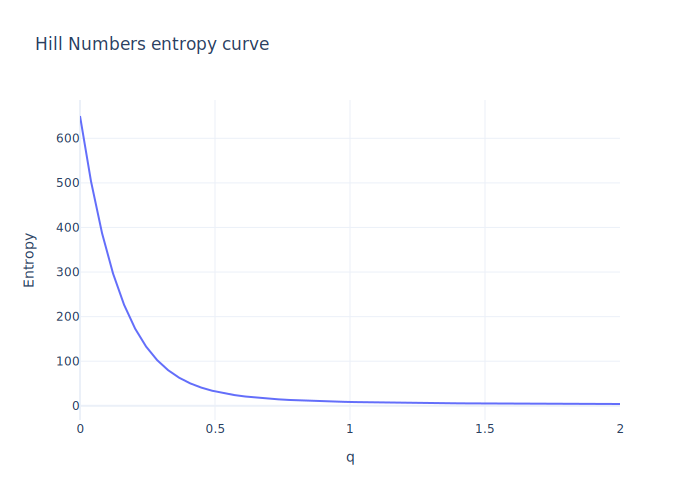

In [9]:
fig = summarizer.plot_entropy_curve()
fig.show("svg")

### Cluster homogeneity

As a measure of cluster homogeneity (within-cluster variation), we consider the proportion of clusters which have no name variation (no misspellings or other variation in the stated name). This measure is computed for each cluster size.

In [10]:
summarizer.get_cluster_unique_name_distribution()

/home/olivieratair/Desktop/PatentsView-Evaluation/pv_evaluation/summary/inventor_disambiguation_summary.py:157: UserWarning:

`meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result



,Number of patents,Proportion of unique name
0,1,1.000000
1,2,0.855018
2,3,0.772828
3,4,0.720112
4,5,0.685250
...,...,...
645,1052,0.000000
646,1067,1.000000
647,1080,0.000000
648,1291,1.000000


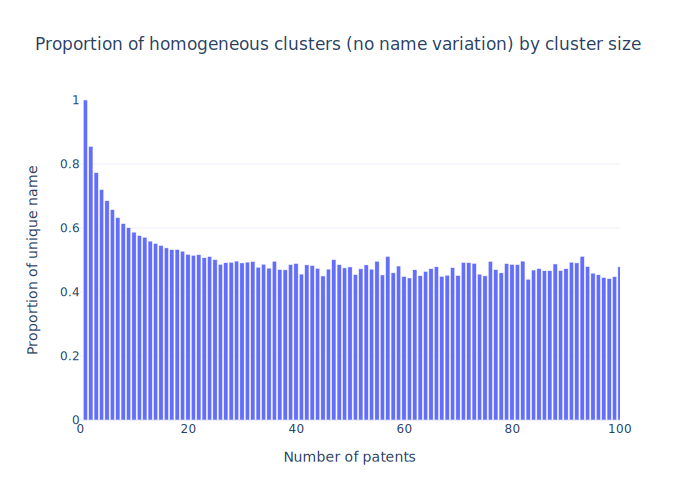

In [11]:
fig = summarizer.plot_cluster_unique_name_distribution(range=(0, 100))
fig.show("svg")

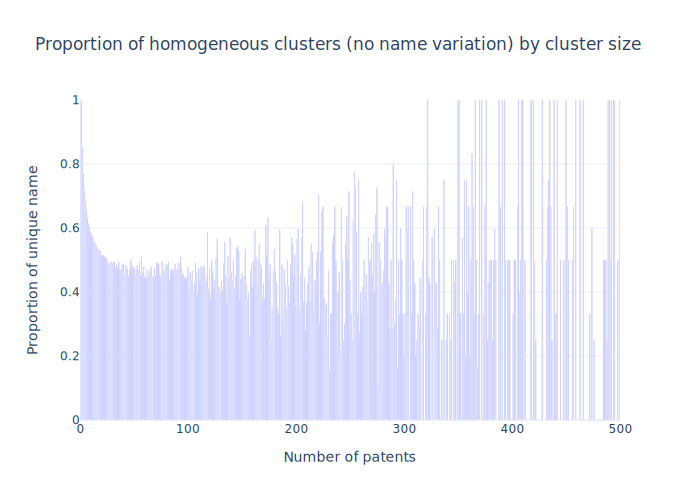

In [12]:
fig = summarizer.plot_cluster_unique_name_distribution(range=(0, 500))
fig.show("svg")

### Homonymy rates

The homonymy rate is the proportion of clusters which share at least one name mention with another cluster.

Use the function `get_homonymy_rate_distribution()` to obtain homonymy rates for each cluster size:

In [13]:
summarizer.get_homonymy_rate_distribution()

/home/olivieratair/Desktop/PatentsView-Evaluation/pv_evaluation/summary/inventor_disambiguation_summary.py:195: UserWarning:

`meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result



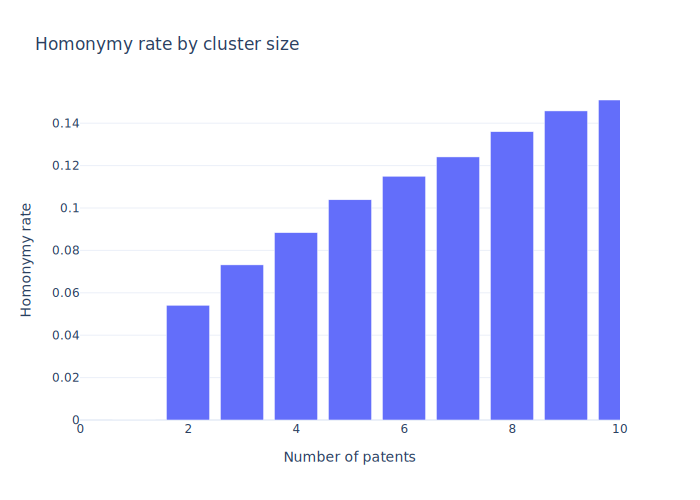

In [ ]:
fig = summarizer.plot_homonymy_rate_distribution()
fig.show("svg")

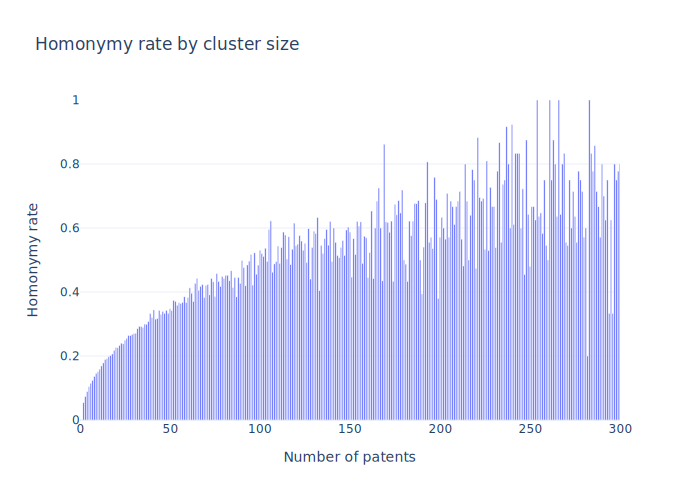

In [ ]:
fig = summarizer.plot_homonymy_rate_distribution(range=(0, 300))
fig.show("svg")

#### Homonomy rate for large clusters

In [ ]:
summarizer.get_homonymy_rate_distribution().sort_values("Number of patents", ascending=False).head(10)

,Number of patents,Homonymy rate
649,6027,1.0
648,4778,0.0
647,2523,1.0
646,2084,1.0
645,1956,1.0
644,1879,1.0
643,1738,1.0
642,1716,1.0
641,1632,1.0
640,1612,1.0
